# Assigment for MRT exercise 9

In [ ]:
import cv2
import scipy.fftpack as sfft
import numpy as np
import matplotlib.pyplot as plt

## Loading image

Upload you image to google colab
- Drag and drop image to folder icon on the left

(-0.5, 1049.5, 667.5, -0.5)

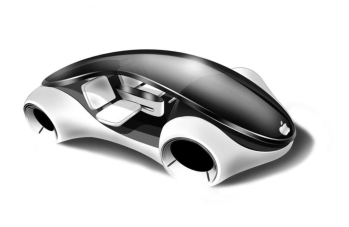

In [ ]:
img = cv2.imread("car.jpg", 0)
plt.imshow(img, cmap='gray')
plt.axis('off')

## Fourier transform 

Fourier transform is computed using `sfft.fft2` function

(-0.5, 1049.5, 667.5, -0.5)

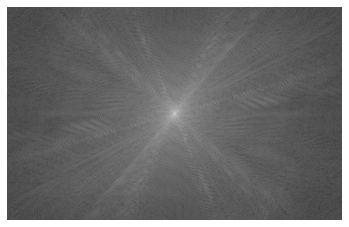

In [ ]:
Z_fft = sfft.fft2(img) # Fourier transform
Z_shift = sfft.fftshift(Z_fft) # shift for visualisation

plt.imshow(np.log10(abs(Z_shift)), cmap='gray')  # log10 for computing magnitude
plt.axis('off')

## Filter 

In this section you will be trying different settings for the filter. 

Try to tweak `FRACTION` variable - fraction of image size as size of filter circle

Use **low** and **high** pass filters with different settings to obtain different results. You can also try to create own filters based for example on gausian distribution (optional).

****Please send me pictures of original image, created filters and reconstructed images**

In [ ]:
FRACTION = 10

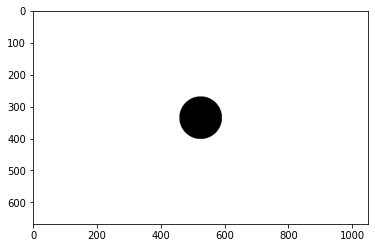

In [ ]:
# --- creating filter ----------
filter = np.zeros(img.shape)
threshold = img.shape[0]/FRACTION
middle_point = img.shape[0]/2, img.shape[1]/2

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        d = ( (i - middle_point[0])**2 + (j - middle_point[1])**2 )**0.5
        if d > threshold:
            filter[i,j] = 1
# -----------------------------

# *for low pass filter 
# filter = -filter  

plt.imshow(filter, cmap='gray')

filter = sfft.ifftshift(filter)

## Image reconstruction


(-0.5, 1049.5, 667.5, -0.5)

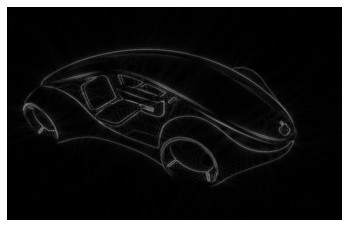

In [ ]:
R = Z_fft * filter # applying filter to Fourier transform of image
reconstructed_image = abs(sfft.ifft2(R)) # Inverse fourier transform 
plt.imshow(reconstructed_image, cmap='gray')
plt.axis("off")